<a href="https://colab.research.google.com/github/sailajakarra/projects-machine-learning-/blob/master/drug_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
spacy.prefer_gpu()

True

In [0]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [0]:
df1 = pd.read_csv('drive/My Drive/drugs_train_raw.csv')

In [0]:
df2= pd.read_csv('drive/My Drive/drugs_test_raw.csv')

In [0]:
df=pd.concat([df1,df2])

In [0]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [0]:
len(df)

215063

In [0]:
df.rename(columns={'uniqueID':'id','drugName':'drug_name','usefulCount':'useful_count'},inplace=True)

In [0]:
df.isnull().sum()

id                 0
drug_name          0
condition       1194
review             0
rating             0
date               0
useful_count       0
dtype: int64

In [0]:
df.dropna(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
id              213869 non-null int64
drug_name       213869 non-null object
condition       213869 non-null object
review          213869 non-null object
rating          213869 non-null int64
date            213869 non-null object
useful_count    213869 non-null int64
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [0]:
df.isnull().sum()

id              0
drug_name       0
condition       0
review          0
rating          0
date            0
useful_count    0
dtype: int64

In [0]:
reviews = df['review']
rating = df['rating']

**EDA**

Text(0.5, 1.0, 'Rating by count')

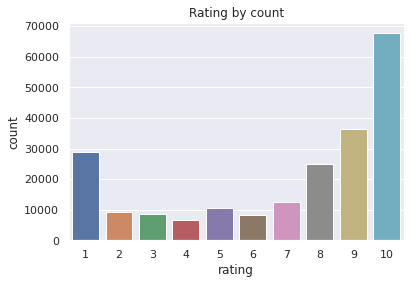

In [0]:
sns.set(style='darkgrid')
sns_rating=sns.countplot(df['rating'])
sns_rating.set_title('Rating by count')

In [0]:
df['review_len']=df['review'].apply(len)

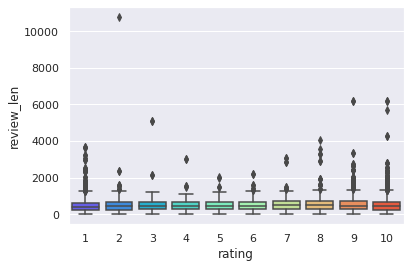

In [0]:
sns.boxplot(x='rating',y='review_len',data=df,palette='rainbow')

In [0]:
df[df['review_len']>= 9000]

,id,drug_name,condition,review,rating,date,useful_count,review_len
75663,121004,Venlafaxine,Migraine,"""Two and a half months ago I was prescribed Ve...",2,18-Jun-17,9,10787


In [0]:
df.drop(75663,inplace=True)

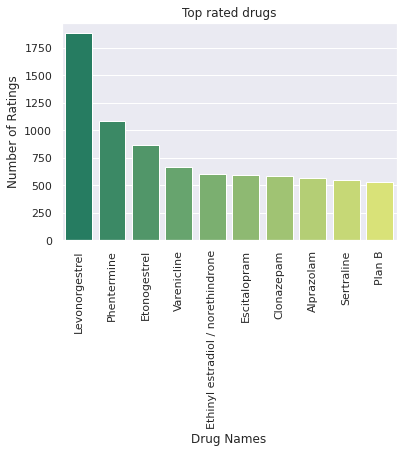

In [0]:
rating = dict(df.loc[df.rating == 10, "drug_name"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10],palette='summer')

sns_rating.set_title('Top rated drugs')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

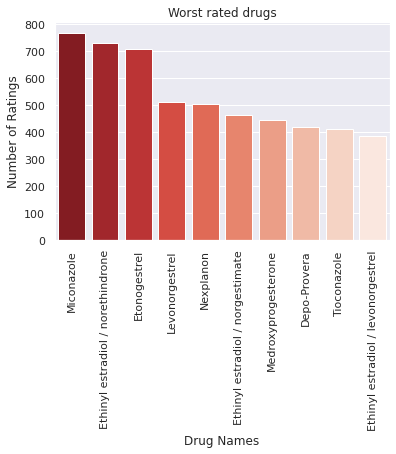

In [0]:
rating = dict(df.loc[df.rating == 1, "drug_name"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10],palette='Reds_r')

sns_rating.set_title('Worst rated drugs')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

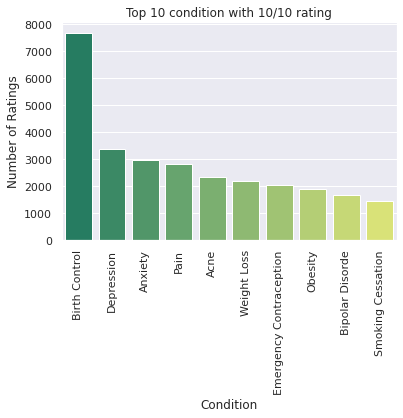

In [0]:
rating = dict(df.loc[df.rating == 10, "condition"].value_counts())
condition = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = condition[0:10], y = drug_rating[0:10],palette='summer')

sns_rating.set_title('Top 10 condition with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Condition")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

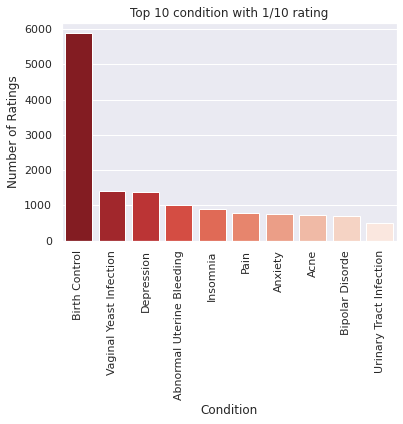

In [0]:
rating = dict(df.loc[df.rating == 1, "condition"].value_counts())
condition = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = condition[0:10], y = drug_rating[0:10],palette='Reds_r')

sns_rating.set_title('Top 10 condition with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Condition")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Here we are going to use SPACY to clean up the data we read from pandas

In [0]:
nlp = spacy.load('en_core_web_sm')

Step 1: Tokenize the reviews, please note given the large amount of train data, this is going to take a while

In [0]:
print(len(df['review']))
print(len(df['rating']))

213868
213868


In [0]:
df['token_review'] = df['review'].apply(nlp, disable=['parser','ner','tagger'])

In [0]:
stop_words = nlp.Defaults.stop_words
punctuations = '  ...!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\r\n\ufeff1\r\n\r\n&#039;'

In [0]:
def feature_engineered_tokenized_review(tr):
    test = [token.lemma_.lower() for token in tr if token.lemma_.lower() not in stop_words and token.lemma_.lower() not in punctuations and token.lemma_ not in ['-PRON-']]
    return test

In [0]:
df['fe_treview'] = df['token_review'].apply(feature_engineered_tokenized_review)

Step3: Sequence to Vector

In [0]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['fe_treview'])
sequences = tokenizer.texts_to_sequences(df['fe_treview'])

In [0]:
seq_lens = [len(x) for x in sequences]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

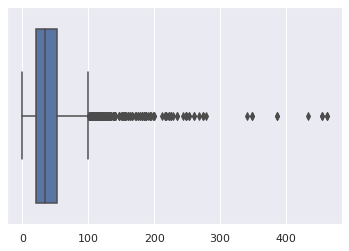

In [0]:
sns.boxplot(seq_lens)

In [0]:
df['review'][0]

0    "It has no side effect, I take it in combinati...
0    "I&#039;ve tried a few antidepressants over th...
Name: review, dtype: object

In [0]:
sequences[0]

[7, 548, 2234, 42, 14, 2579, 1126]

list

Step4: Padding the reviews (Feature Engineered and tokenized one)

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential

In [0]:
maxlen = 125
x = sequence.pad_sequences(sequences, maxlen=maxlen)

In [0]:
from keras.utils import to_categorical

y_cat = to_categorical(df['rating'], num_classes=11)

In [0]:
X = x
y = y_cat

In [0]:
print(X.shape)
print(y.shape)

(213868, 125)
(213868, 11)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Here comes Keras code for sentiment analysis

In [0]:
from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [0]:
vocabulary_size = len(tokenizer.word_counts)
batch_size = 64

----------   Model1: Bidirectional LSTM --------------------

In [0]:
model1 = Sequential()
model1.add(Embedding(vocabulary_size, 64, input_length=maxlen))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(11,activation='softmax'))

In [0]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
print('Train...')
model1.fit(X_train, y_train,epochs=5)

Train...
Epoch 1/5
143291/143291 [==============================] - 1983s 14ms/step - loss: 1.6909 - acc: 0.4043
Epoch 2/5
143291/143291 [==============================] - 1989s 14ms/step - loss: 1.5116 - acc: 0.4545
Epoch 3/5
143291/143291 [==============================] - 1985s 14ms/step - loss: 1.3616 - acc: 0.5072
Epoch 4/5
143291/143291 [==============================] - 1974s 14ms/step - loss: 1.1986 - acc: 0.5689
Epoch 5/5
143291/143291 [==============================] - 1997s 14ms/step - loss: 1.0316 - acc: 0.6343


In [0]:
 score, acc = model1.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

70577/70577 [==============================] - 175s 2ms/step
Test score: 1.580282852284411
Test accuracy: 0.4982076313838618


In [0]:
#df = pd.read_csv('drive/My Drive/drugs_train_raw.csv')
model1.save('drive/My Drive/model1_Bidir_LSTM.hd5')

In [0]:
model1=model.load('drive/My Drive/model1_Bidir_LSTM.hd5')

---------- End of Model1: **Bidirectional LSTM**, accurancy:[**0.6343** ] ------------------

In [0]:
# Test score: 1.580282852284411
# Test accuracy: 0.4982076313838618

In [0]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['acc'])
    plt.plot(history['loss'])
    plt.legend(['Accuracy', 'loss'])
    plt.title('Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [0]:
visualize_training_results(model1.history)
# k = model1.history
# k.history

----------   Model2: 1D CNN for text classification --------------------

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [0]:
max_features = vocabulary_size

batch_size = 64
embedding_dims = 64
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 8

In [0]:
print('Build model...')
model2 = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
#model1.add(Embedding(vocabulary_size, 64, input_length=maxlen))

model2.add(Embedding(vocabulary_size,embedding_dims,input_length=maxlen))

model2.add(Dropout(0.15))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model2.add(Conv1D(filters,kernel_size,padding='valid', activation='relu',strides=1))

# we use max pooling:
model2.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model2.add(Dense(hidden_dims))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model2.add(Dense(11))
model2.add(Activation('sigmoid'))


Build model...


In [0]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
print('Train...')
model2.fit(X_train, y_train,epochs=epochs)


Train...
Epoch 1/8
143291/143291 [==============================] - 28s 199us/step - loss: 1.7247 - acc: 0.3946
Epoch 2/8
143291/143291 [==============================] - 28s 194us/step - loss: 1.5237 - acc: 0.4446
Epoch 3/8
143291/143291 [==============================] - 27s 191us/step - loss: 1.3564 - acc: 0.4953
Epoch 4/8
143291/143291 [==============================] - 28s 196us/step - loss: 1.2045 - acc: 0.5495
Epoch 5/8
143291/143291 [==============================] - 28s 194us/step - loss: 1.0787 - acc: 0.5951
Epoch 6/8
143291/143291 [==============================] - 28s 192us/step - loss: 0.9835 - acc: 0.6310
Epoch 7/8
143291/143291 [==============================] - 28s 193us/step - loss: 0.9072 - acc: 0.6606
Epoch 8/8
143291/143291 [==============================] - 28s 193us/step - loss: 0.8402 - acc: 0.6857


In [0]:
score, acc = model2.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

70577/70577 [==============================] - 2s 28us/step
Test score: 1.594077046808629
Test accuracy: 0.5395667143784159


In [0]:
model2.save('drive/My Drive/model2_Conv1d_GloMaxPool.hd5')

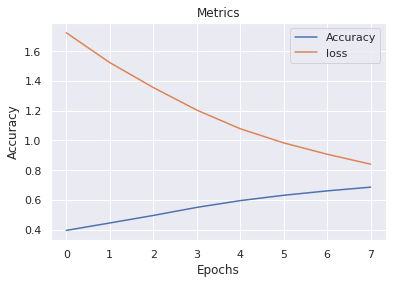

In [0]:
visualize_training_results(model2.history)

---------- End of Model2: **Conv1D** , loss: 0.8402 - acc: 0.6857 ------------------

In [0]:
# Test score: 1.594077046808629
# Test accuracy: 0.5395667143784159

----------   Model3: Conv1D + LSTM  --------------------

In [0]:
from keras.layers import MaxPooling1D

In [0]:
max_features = vocabulary_size
#maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 15

In [0]:
model3 = Sequential()
model3.add(Embedding(max_features, embedding_size, input_length=maxlen))
model3.add(Dropout(0.25))
model3.add(Conv1D(filters,kernel_size, padding='valid',activation='relu',strides=1))
model3.add(MaxPooling1D(pool_size=pool_size))
model3.add(LSTM(lstm_output_size))
model3.add(Dense(11))
model3.add(Activation('sigmoid'))

In [0]:
model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
print('Train...')
results = model3.fit(X_train, y_train,epochs=epochs)

Train...
Epoch 1/15
143291/143291 [==============================] - 227s 2ms/step - loss: 1.7321 - acc: 0.3930
Epoch 2/15
143291/143291 [==============================] - 230s 2ms/step - loss: 1.5383 - acc: 0.4475
Epoch 3/15
143291/143291 [==============================] - 218s 2ms/step - loss: 1.3598 - acc: 0.5088
Epoch 4/15
143291/143291 [==============================] - 218s 2ms/step - loss: 1.1827 - acc: 0.5787
Epoch 5/15
143291/143291 [==============================] - 218s 2ms/step - loss: 1.0277 - acc: 0.6399
Epoch 6/15
143291/143291 [==============================] - 218s 2ms/step - loss: 0.8975 - acc: 0.6878
Epoch 7/15
143291/143291 [==============================] - 217s 2ms/step - loss: 0.7993 - acc: 0.7266
Epoch 8/15
143291/143291 [==============================] - 218s 2ms/step - loss: 0.7243 - acc: 0.7529
Epoch 9/15
143291/143291 [==============================] - 219s 2ms/step - loss: 0.6622 - acc: 0.7750
Epoch 10/15
143291/143291 [==============================] - 224

In [0]:
score, acc = model3.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

70577/70577 [==============================] - 44s 629us/step
Test score: 1.6425871821967422
Test accuracy: 0.6208821637121682


In [0]:
model3.save('drive/My Drive/model3_Conv1d_MaxPool_LSTM.hd5')

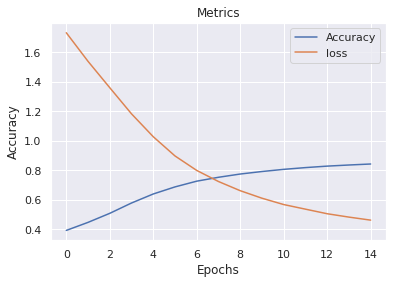

In [0]:
visualize_training_results(model3.history)

---------- End of Model3: **Conv1D+LSTM** ,loss: 0.4626 - acc: 08429------------

In [0]:
# Test score: 1.6425871821967422
# Test accuracy: 0.6208821637121682

In [0]:
model_viz = keras.utils.vis_utils.model_to_dot(Model3)
IPython.display.SVG(model_viz.create(prog='dot', format='svg'))